**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
np.load("/content/drive/My Drive/TanGen Data/processed_npys/0.npy")

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

**Import the libraries we'll need for the training**

In [ ]:
# Just running with my mini data project imports for now, clean up later
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import random
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Custom Dataloader**

In [ ]:
import io
import os
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# data = [voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data, voxel_training_data]

class VoxelizedHoldsDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """

    def __len__(self):
        return 2

    def __getitem__(self, idx):
        # print(self.data[idx].shape)
        idx = idx + 0
        data_pt = np.load(f"/content/drive/My Drive/TanGen Data/processed_npys/{idx}.npy")
        print(f"/content/drive/My Drive/TanGen Data/processed_npys/{idx}.npy")
        dp = torch.tensor(data_pt, dtype=torch.float32)
        return dp.unsqueeze(0)

In [ ]:
dset = VoxelizedHoldsDataset()
dataloader = DataLoader(dset, batch_size=2,
                        shuffle=True, num_workers=4)

In [ ]:
# Define the GAN architectures. These should largely be mirrored, just different
# inputs and outputs

# Generator model
class Generator(nn.Module):
    """ Docstring emoji later """
    def __init__(self, in_channels=200, int_channels1=512, int_channels2=256, int_channels3=128, int_channels4=64):
        super(Generator,self).__init__()
        # Add math here for the intermediate layer sizes if necessary

        # Define the model layers, likely transposed convolutional layers
        self.transpose_conv1 = nn.ConvTranspose3d(in_channels, int_channels1, kernel_size=4, stride=2, padding=1)
        self.transpose_conv2 = nn.ConvTranspose3d(int_channels1, int_channels2, kernel_size=4, stride=2, padding=1)
        self.transpose_conv3 = nn.ConvTranspose3d(int_channels2, int_channels3, kernel_size=4, stride=2, padding=1)
        self.transpose_conv4 = nn.ConvTranspose3d(int_channels3, int_channels4, kernel_size=4, stride=2, padding=1)
        self.transpose_conv5 = nn.ConvTranspose3d(int_channels4, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        # Add batch normalization????
        # Implement the forward pass of the model here using Relu for the
        # generator
        out = F.relu(self.transpose_conv1(x))
        out = F.relu(self.transpose_conv2(out))
        out = F.relu(self.transpose_conv3(out))
        out = F.relu(self.transpose_conv4(out))
        out = F.relu(self.transpose_conv5(out))

        # If all went well this should be a 1x32x32x32 tensor
        return out

# Discriminator model
class Discriminator(nn.Module):
    """ This more or less mirrors the generator """
    def __init__(self, int_channels1=64, int_channels2=128, int_channels3=256, int_channels4=512, int_channels5=200):
        super(Discriminator,self).__init__()
        # Add math here for the intermediate layer sizes

        # Define the model layers, likely transposed convolutional layers
        self.conv1 = nn.Conv3d(1, int_channels1, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv3d(int_channels1, int_channels2, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv3d(int_channels2, int_channels3, kernel_size=4, stride=2, padding=1)
        self.conv4 = nn.Conv3d(int_channels3, int_channels4, kernel_size=4, stride=2, padding=1)
        self.conv5 = nn.Conv3d(int_channels4, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        # Add batch normalization???
        # Implement the forward pass of the model here
        out = F.leaky_relu(self.conv1(x))
        out = F.leaky_relu(self.conv2(out))
        out = F.leaky_relu(self.conv3(out))
        out = F.leaky_relu(self.conv4(out))
        out = F.sigmoid(self.conv5(out))

        # If all went well this should be a binary classification output
        return out

**Imports for Training**

In [ ]:
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 2

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 200

# Number of channels in the training images. For color images this is 3
nc = 1

# Number of training epochs
num_epochs = 400

# Learning rate for optimizers
# lr = 0.0002
# New learning rate test
lr_g = 0.0025
lr_d = 0.00001

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

Random Seed:  999


In [ ]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
def smoothness_loss(fake):
    return torch.sum(torch.abs(fake[:, :, :-1] - fake[:, :, 1:])) + \
           torch.sum(torch.abs(fake[:, :-1, :] - fake[:, 1:, :])) + \
           torch.sum(torch.abs(fake[:-1, :, :] - fake[1:, :, :]))

lambda_smooth = 1e-5

**Original version of this code came from** https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

In [ ]:
'''
Training loop
'''

# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

latent_noise_dimensions = 1

# Create the generator
netG = Generator(latent_noise_dimensions).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
# print(netG)

# Create the Discriminator
netD = Discriminator().to(device)

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(batch_size, latent_noise_dimensions, 1, 1, 1, device=device)
# fixed_noise = torch.randn(1, 200, 1, 1, device=device) # Cuda out of memory 112

# Establish convention for real and fake labels during training
real_label = 0.9
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr_d, betas=(.2, 0.500))
optimizerG = optim.Adam(netG.parameters(), lr=lr_g, betas=(beta1, 0.999))

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    print(f"epoch: {epoch}")
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)

        # # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        # ## Train with all-fake batch
        # # Generate batch of latent vectors
        noise = torch.randn(b_size, latent_noise_dimensions, 1, 1, 1, device=device)
        # # Generate fake image batch with G
        fake = netG(noise)
        # print(f"fake shape: {fake.shape}")
        label.fill_(fake_label)
        # # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # print(f"disc output: {output.shape}")
        # # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # # Update D
        optimizerD.step()

        # ############################
        # # (2) Update G network: maximize log(D(G(z)))
        # ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # # Calculate G's loss based on this output
        # errG = criterion(output, label)
        errG = criterion(output, label) + lambda_smooth * smoothness_loss(fake)

        # # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # # Update G
        optimizerG.step()

        # # Output training stats
        if i % 1 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        if epoch % 50 == 0:
            save_path = "gan_checkpoint2.pth"

            # Save state dictionaries
            torch.save({
                'generator_state_dict': netG.state_dict(),
                'discriminator_state_dict': netD.state_dict(),
                'optimizer_g_state_dict': optimizerG.state_dict(),
                'optimizer_d_state_dict': optimizerD.state_dict(),
                'epoch': epoch  # Optional, useful for resuming training
            }, save_path)


        # # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        iters += 1

Discriminator(
  (conv1): Conv3d(1, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (conv2): Conv3d(64, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (conv3): Conv3d(128, 256, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (conv4): Conv3d(256, 512, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (conv5): Conv3d(512, 1, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
)
Starting Training Loop...
epoch: 0
/content/drive/My Drive/TanGen Data/processed_npys/7.npy
/content/drive/My Drive/TanGen Data/processed_npys/8.npy
[0/400][0/1]	Loss_D: 1.4011	Loss_G: 0.6810	D(x): 0.5130	D(G(z)): 0.5173 / 0.5083
epoch: 1
/content/drive/My Drive/TanGen Data/processed_npys/8.npy
/content/drive/My Drive/TanGen Data/processed_npys/7.npy
[1/400][0/1]	Loss_D: 1.4060	Loss_G: 0.6917	D(x): 0.5032	D(G(z)): 0.5123 / 0.5029
epoch: 2
/content/drive/My Drive/TanGen Data/processed_npys/8.npy
/content/drive/My Drive/TanGen Data/processed_npy

In [ ]:
import trimesh
fake = netG(noise).squeeze()
threshold = 0.7  # Adjust based on your use case
binary_fake = (fake > threshold).cpu().numpy().astype(bool)
print("Voxel grid unique values:", np.unique(binary_fake))
print(fake.shape)
from skimage.transform import resize

new_voxel = trimesh.voxel.base.VoxelGrid(binary_fake)

print(f"voxel: {new_voxel.shape}")
mc = new_voxel.marching_cubes

# Save the remeshed surface as an STL file
mc.export("test5.stl")


Voxel grid unique values: [False  True]
torch.Size([32, 32, 32])
voxel: (32, 32, 32)


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xea\x16\x00\x00:\xcd\x13\xbf:\xcd\x13\xbf:\xcd\x13\xbf\x00\x00\x00\x00\x00\x00\x80@\x00\x00\xf0@\x00\x00\x00\x00\x00\x00`@\x00\x00\x00A\x00\x00\x00\xbf\x00\x00\x80@\x00\x00\x00A\x00\x00:\xcd\x13\xbf:\xcd\x13\xbf:\xcd\x13?\x00\x00\x00\x00\x00\x00\x80@\x00\x00\x08A\x00\x00\x00\xbf\x00\x00\x80@\x00\x00\x00A\x00\x00\x00\x00\x00\x00`@\x00\x00\x00A\x00\x00:\xcd\x13\xbf:\xcd\x13?:\xcd\x13\xbf\x00\x00\x00\x00\x00\x00\x90@\x00\x00\x00A\x00\x00\x00\x00\x00\x00\x80@\x00\x00\xf0@\x00\x00\x00\xbf\x00\x00\x80@\x00\x00\x00A\x00\x00:\xcd\x13\xbf:\xcd\x13\xbf:\xcd\x13\xbf\x00\x00\x00\x00\x00\x00\x90@\x00\x00\x10A\x00\x00\x00\xbf\x00\x00\xa0@\x00\x00\x10A\x00\x00\x00\x00\x00\x00\xa0@\x0

In [ ]:
! pip install trimesh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.8/704.8 kB 11.7 MB/s eta 0:00:00


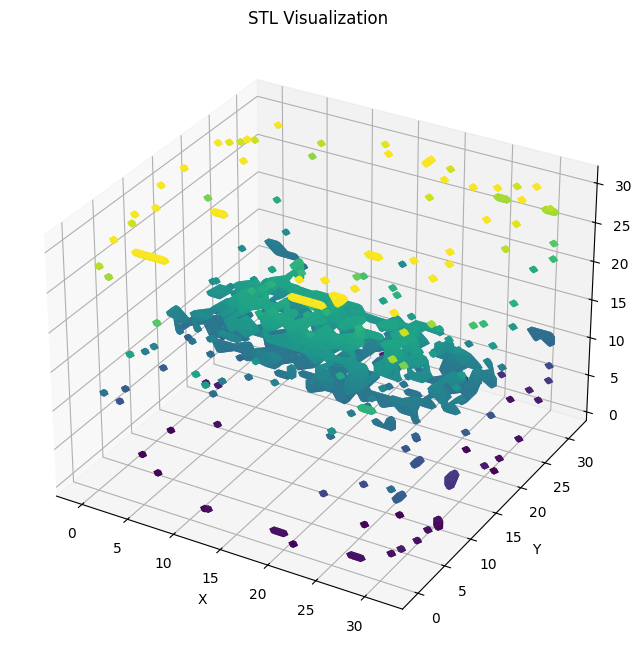

In [ ]:
import trimesh
import matplotlib.pyplot as plt

# Load the STL file
# mesh = trimesh.load("test.stl")
# Load the STL file
mesh = trimesh.load("test5.stl")

mesh.fill_holes()

# components = mesh.split(only_watertight=False)

# mesh = components[8]

# mesh.fill_holes()

# Create a Matplotlib 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh
ax.plot_trisurf(
    mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2],
    triangles=mesh.faces, cmap="viridis", edgecolor="none"
)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("STL Visualization")

# Save the figure as an image
plt.savefig("stl_visualization.png")
plt.show()

# Load the STL file
# mesh = trimesh.load("test4.stl")

# # Create a Matplotlib 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the mesh
# ax.plot_trisurf(
#     mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2],
#     triangles=mesh.faces, cmap="viridis", edgecolor="none"
# )

# # Set labels
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# plt.title("STL Visualization")

# # Save the figure as an image
# plt.savefig("stl_visualization.png")
# plt.show()